In [1]:
import pandas as pd               # to read and operate on the dataset
import matplotlib.pyplot as plt   # creating visualisation of the dataset given 
import numpy as np                # converting to numpy arrays 

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,product,quantity,price,date,address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August


# Deal with Null values

In [3]:
df.isnull().sum()

order_id    0
product     0
quantity    0
price       0
date        0
address     0
month       0
dtype: int64

# Data preprocessing
### preprocessing date

In [4]:
df.head()

,order_id,product,quantity,price,date,address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August


In [5]:
df.describe()

,order_id,product,quantity,price,date,address,month
count,186305,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788,12
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,December
freq,355,21903,168552,21903,355,355,25037


In [6]:
data = []

for i in df.values:
    if i[0] != 'Order ID':               # removing the the unwanted order id from the dataset 
        data.append(i)
        
data = pd.DataFrame(data,columns =['order_id','product','quantity','price','date','address','month'])

data.head()

,order_id,product,quantity,price,date,address,month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August


## Adding amount column 

In [7]:
tot_amt = []
for i in data.values:
    tot_amt.append(float(i[2])*float(i[3]))      # adding the amount column
    
data['amount'] = tot_amt
data.head()

,order_id,product,quantity,price,date,address,month,amount
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August,99.99
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August,7.68


In [8]:
## preprocessing the quantity column into integer 

In [9]:
quan =[]
for i in data['quantity']:
    quan.append(int(i))                          # string to integer
data['quantity'] = quan
data.head()

,order_id,product,quantity,price,date,address,month,amount
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August,99.99
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",August,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August,7.68


In [10]:
price  =[]
for i in data['price']:
    price.append(float(i))                        # string to float
data['price'] = price
data.head()

,order_id,product,quantity,price,date,address,month,amount
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",August,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",August,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",August,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",August,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",August,7.68


## preprocessing date and time (into hours)

In [11]:
date = []
hour = []

for i in data.values:
    date.append(i[4].split(' ')[0])                     # getting the date
    hour.append(i[4].split(' ')[1].split(':')[0])       # getting the hour 
    
data['date'] = date
data['hour'] = hour

data.head()

,order_id,product,quantity,price,date,address,month,amount,hour
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,23.98,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,99.99,15
2,236672,iPhone,1,700.00,08/06/19,"149 7th St, Portland, OR 97035",August,700.00,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,7.68,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,7.68,19


## pre processing the date column

In [12]:
day   = []
month = []
year  = []

for i in data.values:
    month.append(int(i[4].split('/')[0]))         # getting the month from the date column
    day.append(int(i[4].split('/')[1]))           # getting the day from the date column
    year.append(int('20'+i[4].split('/')[2]))     # getting the year from the date column
    
data['day'] = day
data['month_'] = month
data['year'] = year

data.head()

,order_id,product,quantity,price,date,address,month,amount,hour,day,month_,year
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,23.98,22,31,8,2019
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,99.99,15,15,8,2019
2,236672,iPhone,1,700.00,08/06/19,"149 7th St, Portland, OR 97035",August,700.00,14,6,8,2019
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,7.68,20,29,8,2019
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,7.68,19,15,8,2019


## pre processing the address

In [13]:
pincode   = []
city_code = []
city      = []
street_   = []

for i in data.values:
    address = [address.strip() for address in i[5].split(',')]     # getting the address  
    pincode.append(int(address[-1].split(' ')[-1]))                # getting the pincode  
    city_code.append(address[-1].split(' ')[0])                    # getting the city_code  
    city.append(address[1])                                        # getting the city  
    street_.append(address[0])                                     # getting the street  

data['street']    = street_
data['city']      = city
data['city_code'] = city_code
data['pincode']   = pincode

In [14]:
# pre processing pincodes 

In [15]:
datas = []
for i in data.values:
    if len(str(i[15])) != 4:                                                                                          # only getting the pincode with len 5 
        datas.append([i[0],i[1],i[2],i[3],i[4],i[5],i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13],i[14],i[15]])       
datas = pd.DataFrame(datas,columns =['order_id', 'product', 'quantity', 'price', 'date', 'address', 'month','amount', 'hour', 'day', 'month_', 'year', 'street', 'city','city_code','pincode'])
data = datas

In [16]:
data

,order_id,product,quantity,price,date,address,month,amount,hour,day,month_,year,street,city,city_code,pincode
0,236670,Wired Headphones,2,11.99,08/31/19,"359 Spruce St, Seattle, WA 98101",August,23.98,22,31,8,2019,359 Spruce St,Seattle,WA,98101
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19,"492 Ridge St, Dallas, TX 75001",August,99.99,15,15,8,2019,492 Ridge St,Dallas,TX,75001
2,236672,iPhone,1,700.00,08/06/19,"149 7th St, Portland, OR 97035",August,700.00,14,6,8,2019,149 7th St,Portland,OR,97035
3,236673,AA Batteries (4-pack),2,3.84,08/29/19,"631 2nd St, Los Angeles, CA 90001",August,7.68,20,29,8,2019,631 2nd St,Los Angeles,CA,90001
4,236674,AA Batteries (4-pack),2,3.84,08/15/19,"736 14th St, New York City, NY 10001",August,7.68,19,15,8,2019,736 14th St,New York City,NY,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163556,162004,Apple Airpods Headphones,1,150.00,02/12/19,"227 Church St, San Francisco, CA 94016",February,150.00,22,12,2,2019,227 Church St,San Francisco,CA,94016
163557,162005,AAA Batteries (4-pack),2,2.99,02/04/19,"417 Jefferson St, Los Angeles, CA 90001",February,5.98,20,4,2,2019,417 Jefferson St,Los Angeles,CA,90001
163558,162006,USB-C Charging Cable,1,11.95,02/24/19,"498 8th St, Atlanta, GA 30301",February,11.95,06,24,2,2019,498 8th St,Atlanta,GA,30301
163559,162007,USB-C Charging Cable,1,11.95,02/24/19,"715 7th St, Dallas, TX 75001",February,11.95,19,24,2,2019,715 7th St,Dallas,TX,75001


# Creating orders column 

 ### Find the number of unique orders placed so far

In [17]:
n_data = []
for i in data['product'].unique():
    df_ = (data[data['product']==i])                              # getting the products and converting it into a dataframe
    n_data.append([i,df_['price'].mode().values[0],df_['quantity'].sum(),len(df_),df_['quantity'].max(),int(df_['amount'].sum())])
    
df = pd.DataFrame(n_data,columns =['Name_of_the_product','price','quantity','orders','max_quantity_per_user','total_amount'])
df

,Name_of_the_product,price,quantity,orders,max_quantity_per_user,total_amount
0,Wired Headphones,11.99,18056,16607,4,216491
1,Bose SoundSport Headphones,99.99,11861,11745,3,1185981
2,iPhone,700.00,6017,6011,2,4211900
3,AA Batteries (4-pack),3.84,24230,18069,7,93043
4,34in Ultrawide Monitor,379.99,5452,5436,2,2071705
5,20in Monitor,109.99,3676,3648,2,404323
6,Macbook Pro Laptop,1700.00,4186,4183,2,7116200
7,LG Washing Machine,600.00,583,583,1,349800
8,27in FHD Monitor,149.99,6639,6600,2,995783
9,Lightning Charging Cable,14.95,20457,19079,4,305832


### How many unique products we're having as per the dataset?

In [18]:
products = []

for i in data.values:
    products.append(i[1])
    
products = list(set(products))
print('total number of unique product placed are : ',len(products))

print('-'*10 + 'Unique Product' + '-'*10)
for product in range(len(products)):
    print(product+1,products[product])
print('-'*34)

total number of unique product placed are :  19
----------Unique Product----------
1 34in Ultrawide Monitor
2 Google Phone
3 Vareebadd Phone
4 Wired Headphones
5 AA Batteries (4-pack)
6 LG Washing Machine
7 27in FHD Monitor
8 ThinkPad Laptop
9 20in Monitor
10 27in 4K Gaming Monitor
11 LG Dryer
12 Bose SoundSport Headphones
13 Apple Airpods Headphones
14 USB-C Charging Cable
15 Flatscreen TV
16 AAA Batteries (4-pack)
17 Macbook Pro Laptop
18 Lightning Charging Cable
19 iPhone
----------------------------------


###  Name the most expensive product on the line

##### single line solution 

In [19]:
most_expensive = list(set(data[data['price'] == max(data['price'])]['product']))
print(most_expensive[0],': $.',max(data['price']))

Macbook Pro Laptop : $. 1700.0


##### using data structures

In [20]:
ls = []
for i in data['price']:
    ls.append(i)
ls = list(set(ls))
list(set(data[data['price'] == max(ls)]['product']))[0]

'Macbook Pro Laptop'

### From which address does the most number of orders are placed?

In [75]:
# simple way 
most_order = data['address'].mode()
described  = data['address'].describe()

print('Most Order is From Address: ')
print('--------------------------------------------')
print(most_order)
print('--------------------------------------------')
print('\n')
print('-----------------described data-----------------')
print(described)
print('------------------------------------------------')

Most Order is From Address
--------------------------------------------
0    193 Forest St, San Francisco, CA 94016
Name: address, dtype: object
--------------------------------------------


-----------------described data-----------------
count                                     163561
unique                                    122780
top       193 Forest St, San Francisco, CA 94016
freq                                           9
Name: address, dtype: object
------------------------------------------------


### Plot number of orders in each month in line graph

In [158]:
months =[]
for month in data['month']:
    months.append(month)                               # fetching the data from the sales data
months = list(set(months))

# direct method since the data contains the data complete 12 months data
# making it month wise format 
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

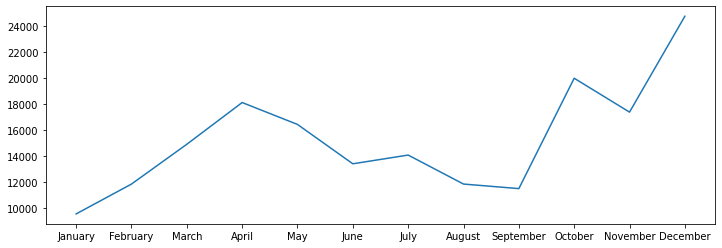

In [22]:
sales = []

for month in months:
    c = 0 
    for i in data.values:
        if month == (i[6]): 
            c += i[2]                                            # adding the quantity of sale at that particular month               
    sales.append([month,c])
    
monthly_sales = pd.DataFrame(sales,columns = ['month','orders']) # creating the dataframe 


# plotting the line graph 
plt.subplots(figsize =(12,4))
plt.plot(monthly_sales['month'],np.array(monthly_sales['orders']))  # converting pandas series to numpy array in order to plot 
plt.show()
            
